In [ ]:
# Student Name : Kevin Xavier Antony Arul Xavier
# Student ID : N01584909
# Capstone - MidTerm Project

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# importing dataset into colab
from google.colab import files
uploaded = files.upload()

Saving risk-test.txt to risk-test.txt


In [3]:
# reading the dataset
dataset = pd.read_csv('risk-train.txt', sep='\t')

In [4]:
# viewing the dataset
dataset.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49917,no,yes,no,1/17/1973,yes,yes,check,?,5.2006,...,no,no,no,8,yes,0,0.00,?,?,?
1,49919,no,yes,yes,12/8/1970,no,no,credit_card,Visa,12.2007,...,yes,no,no,13,yes,0,0.00,?,?,?
2,49923,no,yes,no,4/3/1972,yes,no,check,?,12.2007,...,no,no,no,3,yes,0,0.00,?,?,?
3,49924,no,no,yes,8/1/1966,yes,no,check,?,1.2007,...,no,no,no,11,no,4,75.72,5/12/2002,0,0
4,49927,no,yes,yes,12/21/1969,yes,no,credit_card,Eurocard,12.2006,...,no,no,no,16,yes,0,0.00,?,?,?


In [5]:
dataset.shape

(30000, 44)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ORDER_ID           30000 non-null  int64  
 1   CLASS              30000 non-null  object 
 2   B_EMAIL            30000 non-null  object 
 3   B_TELEFON          30000 non-null  object 
 4   B_BIRTHDATE        30000 non-null  object 
 5   FLAG_LRIDENTISCH   30000 non-null  object 
 6   FLAG_NEWSLETTER    30000 non-null  object 
 7   Z_METHODE          30000 non-null  object 
 8   Z_CARD_ART         30000 non-null  object 
 9   Z_CARD_VALID       30000 non-null  float64
 10  Z_LAST_NAME        30000 non-null  object 
 11  VALUE_ORDER        30000 non-null  float64
 12  WEEKDAY_ORDER      30000 non-null  object 
 13  TIME_ORDER         30000 non-null  object 
 14  AMOUNT_ORDER       30000 non-null  int64  
 15  ANUMMER_01         30000 non-null  int64  
 16  ANUMMER_02         300

In [7]:
# copying feature names seperately
feature_names = dataset.columns

In [8]:
# displaying number of missing values in each feature

# using prettytable because we can display it in a prettier tabular form
from prettytable import PrettyTable

# initializing table
table = PrettyTable()
table.field_names = ["Index", "Feature Name", "Missing Values", "Percentage"]

# adding entries
for i, name in enumerate(feature_names):
  missing_value = dataset[feature_names[i]].isna().sum()
  percentage_of_missing_value = missing_value/len(dataset) * 100
  table.add_row([f'Feature {i+1}', feature_names[i], missing_value, percentage_of_missing_value])

print(table)

+------------+-------------------+----------------+------------+
|   Index    |    Feature Name   | Missing Values | Percentage |
+------------+-------------------+----------------+------------+
| Feature 1  |      ORDER_ID     |       0        |    0.0     |
| Feature 2  |       CLASS       |       0        |    0.0     |
| Feature 3  |      B_EMAIL      |       0        |    0.0     |
| Feature 4  |     B_TELEFON     |       0        |    0.0     |
| Feature 5  |    B_BIRTHDATE    |       0        |    0.0     |
| Feature 6  |  FLAG_LRIDENTISCH |       0        |    0.0     |
| Feature 7  |  FLAG_NEWSLETTER  |       0        |    0.0     |
| Feature 8  |     Z_METHODE     |       0        |    0.0     |
| Feature 9  |     Z_CARD_ART    |       0        |    0.0     |
| Feature 10 |    Z_CARD_VALID   |       0        |    0.0     |
| Feature 11 |    Z_LAST_NAME    |       0        |    0.0     |
| Feature 12 |    VALUE_ORDER    |       0        |    0.0     |
| Feature 13 |   WEEKDAY_

In [ ]:
# # visualizing missing values
# plt.figure(figsize=(8, 5))  # Set the figure size
# sns.heatmap(dataset.isna(), cmap='viridis', cbar=False, annot=True, fmt='.0%', linewidths=.5)

# # Customize labels and title
# plt.title('Missing Values Heatmap')
# plt.xlabel('Features')
# plt.ylabel('Samples')

# # Display the plot
# plt.show()

In [9]:
# Finding duplicates
duplicates = dataset.duplicated()
print(f'Duplicate Rows : \n {dataset[duplicates]}')

Duplicate Rows : 
 Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_METHODE, Z_CARD_ART, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, ANUMMER_02, ANUMMER_03, ANUMMER_04, ANUMMER_05, ANUMMER_06, ANUMMER_07, ANUMMER_08, ANUMMER_09, ANUMMER_10, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAIL_LORT, FAIL_LPLZORTMATCH, FAIL_RPLZ, FAIL_RORT, FAIL_RPLZORTMATCH, SESSION_TIME, NEUKUNDE, AMOUNT_ORDER_PRE, VALUE_ORDER_PRE, DATE_LORDER, MAHN_AKT, MAHN_HOECHST]
Index: []

[0 rows x 44 columns]


In [10]:
# Identifying outliers
dataset.describe()

,ORDER_ID,Z_CARD_VALID,VALUE_ORDER,AMOUNT_ORDER,ANUMMER_01,SESSION_TIME,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,25032.612933,6.680567,43.968058,1.442200,331860.254033,8.577900,0.606700,29.875652
std,14422.306098,3.468332,35.709431,0.921496,147310.846584,3.863448,0.765616,57.382732
min,1.000000,1.200500,5.200000,1.000000,100061.000000,1.000000,0.000000,0.000000
25%,12518.750000,3.200700,17.990000,1.000000,204159.000000,6.000000,0.000000,0.000000
50%,25095.500000,6.200700,34.500000,1.000000,401241.000000,9.000000,0.000000,0.000000
75%,37520.250000,10.200500,57.800000,2.000000,407703.000000,11.000000,1.000000,38.470000
max,50000.000000,12.200700,361.200000,9.000000,609725.000000,24.000000,6.000000,1047.800000


In [ ]:
# Handling Outliers using zscore and IQR

In [11]:
# importing zscore and iqr
from scipy.stats import zscore, iqr

# finding zscore of each element
zscore_of_each = zscore(dataset.select_dtypes(include=['float64','int64']))
zscore_of_each

,ORDER_ID,Z_CARD_VALID,VALUE_ORDER,AMOUNT_ORDER,ANUMMER_01,SESSION_TIME,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE
0,1.725438,-0.426716,-0.732817,-0.47988,0.508802,-0.149584,-0.792447,-0.520647
1,1.725577,1.591608,-0.721616,-0.47988,1.826731,1.144618,-0.792447,-0.520647
2,1.725855,1.591608,-0.928847,-0.47988,0.505401,-1.443786,-0.792447,-0.520647
3,1.725924,-1.579998,0.294939,-0.47988,-0.166326,0.626938,4.432191,0.798936
4,1.726132,1.591579,-0.671488,-0.47988,-0.889924,1.921140,-0.792447,-0.520647
...,...,...,...,...,...,...,...,...
29995,1.718782,-0.138417,-0.721616,-0.47988,0.509127,0.368097,0.513713,0.190903
29996,1.718990,-0.426744,-0.878440,-0.47988,-0.850958,0.368097,1.819872,0.400203
29997,1.719059,1.303252,-0.312753,-0.47988,1.146620,-0.667265,-0.792447,-0.520647
29998,1.719267,-0.715072,-1.085671,-0.47988,1.159138,-0.667265,0.513713,0.227326


In [12]:
zscore_threshold = 3
outlier_columns_zscore = (zscore_of_each.abs() > zscore_threshold).any()
outlier_columns_zscore

ORDER_ID            False
Z_CARD_VALID        False
VALUE_ORDER          True
AMOUNT_ORDER         True
ANUMMER_01          False
SESSION_TIME         True
AMOUNT_ORDER_PRE     True
VALUE_ORDER_PRE      True
dtype: bool

In [13]:
# using IQR
Q1 = dataset.select_dtypes(include=['float64','int64']).quantile(0.25)
Q3 = dataset.select_dtypes(include=['float64','int64']).quantile(0.75)

IQR = Q3 - Q1
IQR

ORDER_ID             25001.5000
Z_CARD_VALID             6.9998
VALUE_ORDER             39.8100
AMOUNT_ORDER             1.0000
ANUMMER_01          203544.0000
SESSION_TIME             5.0000
AMOUNT_ORDER_PRE         1.0000
VALUE_ORDER_PRE         38.4700
dtype: float64

In [14]:
outlier_columns_iqr = (( dataset.select_dtypes(include=['float64','int64']) < (Q1 - 1.5 * IQR)) | (dataset.select_dtypes(include=['float64','int64']) > (Q3 + 1.5 * IQR))).any()
outlier_columns_iqr

ORDER_ID            False
Z_CARD_VALID        False
VALUE_ORDER          True
AMOUNT_ORDER         True
ANUMMER_01          False
SESSION_TIME         True
AMOUNT_ORDER_PRE     True
VALUE_ORDER_PRE      True
dtype: bool

In [ ]:
# from both zscore and IQR, it is clear that features
# 'VALUE_ORDER' 'AMOUNT_ORDER' 'SESSION_TIME' 'AMOUNT_ORDER_PRE' 'VALUE_ORDER_PRE'
# may contain outliers

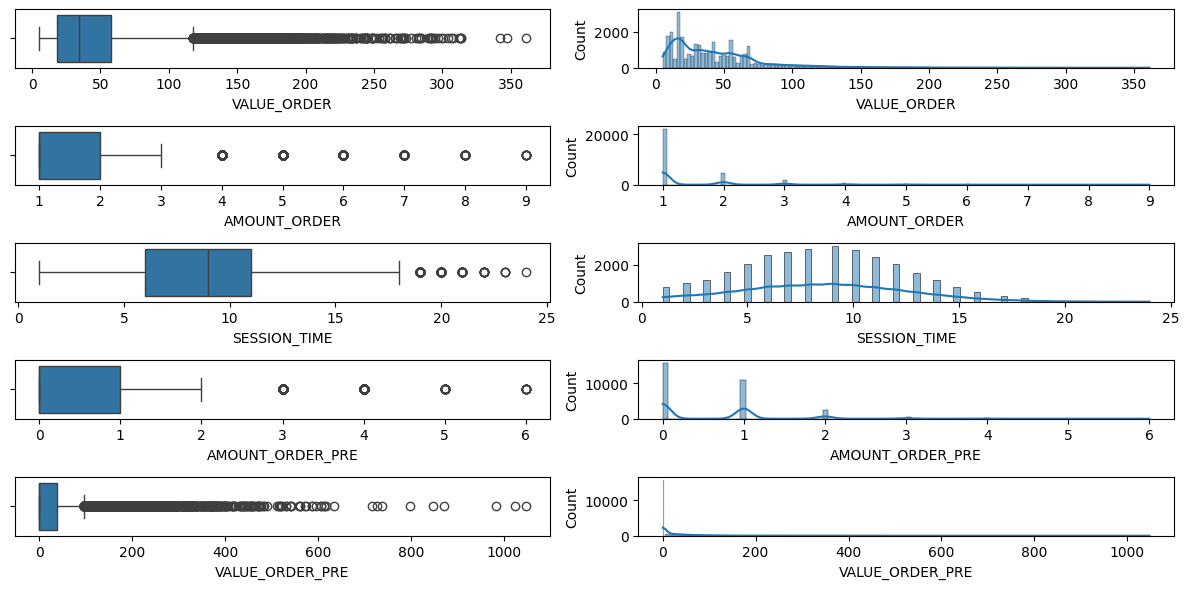

In [15]:
# visualizing
plt.figure(figsize=(12,6))

plt.subplot(5,2,1)
sns.boxplot(data = dataset, x='VALUE_ORDER')
plt.subplot(5,2,2)
sns.histplot(dataset['VALUE_ORDER'],kde=True)

plt.subplot(5,2,3)
sns.boxplot(data = dataset, x='AMOUNT_ORDER')
plt.subplot(5,2,4)
sns.histplot(dataset['AMOUNT_ORDER'],kde=True)

plt.subplot(5,2,5)
sns.boxplot(data = dataset, x='SESSION_TIME')
plt.subplot(5,2,6)
sns.histplot(dataset['SESSION_TIME'],kde=True)

plt.subplot(5,2,7)
sns.boxplot(data = dataset, x='AMOUNT_ORDER_PRE')
plt.subplot(5,2,8)
sns.histplot(dataset['AMOUNT_ORDER_PRE'],kde=True)

plt.subplot(5,2,9)
sns.boxplot(data = dataset, x='VALUE_ORDER_PRE')
plt.subplot(5,2,10)
sns.histplot(dataset['VALUE_ORDER_PRE'],kde=True)

plt.tight_layout()
plt.show()

In [16]:
dataset[['VALUE_ORDER','AMOUNT_ORDER','SESSION_TIME','AMOUNT_ORDER_PRE','VALUE_ORDER_PRE']].describe()

,VALUE_ORDER,AMOUNT_ORDER,SESSION_TIME,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,43.968058,1.442200,8.577900,0.606700,29.875652
std,35.709431,0.921496,3.863448,0.765616,57.382732
min,5.200000,1.000000,1.000000,0.000000,0.000000
25%,17.990000,1.000000,6.000000,0.000000,0.000000
50%,34.500000,1.000000,9.000000,0.000000,0.000000
75%,57.800000,2.000000,11.000000,1.000000,38.470000
max,361.200000,9.000000,24.000000,6.000000,1047.800000


In [17]:
# we add plus 1 to those columns which start with 0 or have negative values
dataset['VALUE_ORDER'] = np.log(dataset['VALUE_ORDER'])
dataset['AMOUNT_ORDER'] = np.log(dataset['AMOUNT_ORDER'])
dataset['SESSION_TIME'] = np.log(dataset['SESSION_TIME'])
dataset['AMOUNT_ORDER_PRE'] = np.log(dataset['AMOUNT_ORDER_PRE']+1)
dataset['VALUE_ORDER_PRE'] = np.log(dataset['VALUE_ORDER_PRE']+1)

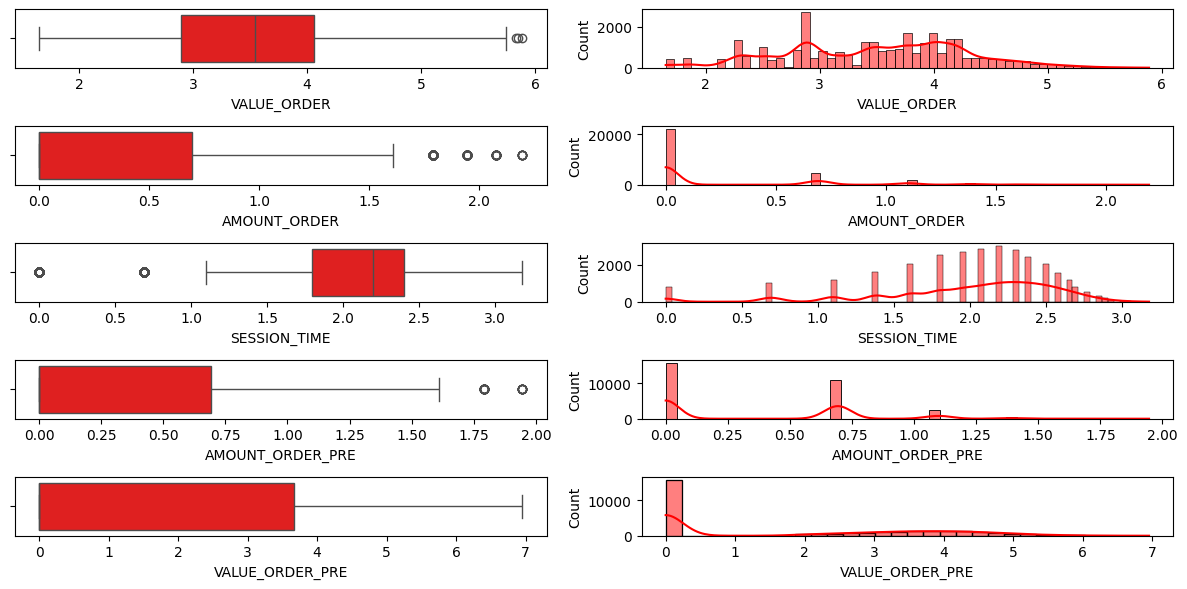

In [18]:
# visualizing
plt.figure(figsize=(12,6))

plt.subplot(5,2,1)
sns.boxplot(data = dataset, x='VALUE_ORDER',color='red')
plt.subplot(5,2,2)
sns.histplot(dataset['VALUE_ORDER'],color='red',kde=True)

plt.subplot(5,2,3)
sns.boxplot(data = dataset, x='AMOUNT_ORDER',color='red')
plt.subplot(5,2,4)
sns.histplot(dataset['AMOUNT_ORDER'],color='red',kde=True)

plt.subplot(5,2,5)
sns.boxplot(data = dataset, x='SESSION_TIME',color='red')
plt.subplot(5,2,6)
sns.histplot(dataset['SESSION_TIME'],color='red',kde=True)

plt.subplot(5,2,7)
sns.boxplot(data = dataset, x='AMOUNT_ORDER_PRE',color='red')
plt.subplot(5,2,8)
sns.histplot(dataset['AMOUNT_ORDER_PRE'],color='red',kde=True)

plt.subplot(5,2,9)
sns.boxplot(data = dataset, x='VALUE_ORDER_PRE',color='red')
plt.subplot(5,2,10)
sns.histplot(dataset['VALUE_ORDER_PRE'],color='red',kde=True)

plt.tight_layout()
plt.show()

In [19]:
dataset.describe()

,ORDER_ID,Z_CARD_VALID,VALUE_ORDER,AMOUNT_ORDER,ANUMMER_01,SESSION_TIME,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,25032.612933,6.680567,3.491799,0.243381,331860.254033,2.010841,0.377591,1.764807
std,14422.306098,3.468332,0.783059,0.441120,147310.846584,0.592455,0.425966,1.972611
min,1.000000,1.200500,1.648659,0.000000,100061.000000,0.000000,0.000000,0.000000
25%,12518.750000,3.200700,2.889816,0.000000,204159.000000,1.791759,0.000000,0.000000
50%,25095.500000,6.200700,3.540959,0.000000,401241.000000,2.197225,0.000000,0.000000
75%,37520.250000,10.200500,4.056989,0.693147,407703.000000,2.397895,0.693147,3.675541
max,50000.000000,12.200700,5.889432,2.197225,609725.000000,3.178054,1.945910,6.955402


In [20]:
# normalizing numerical data within range 0 to 1 (MinMaxScalar)
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['ORDER_ID','Z_CARD_VALID','VALUE_ORDER','AMOUNT_ORDER','ANUMMER_01','SESSION_TIME','AMOUNT_ORDER_PRE','VALUE_ORDER_PRE']

#initializing the scalar
scaler = MinMaxScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

In [21]:
# after scaling
dataset.describe()

,ORDER_ID,Z_CARD_VALID,VALUE_ORDER,AMOUNT_ORDER,ANUMMER_01,SESSION_TIME,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.500642,0.498179,0.434624,0.110768,0.454808,0.632727,0.194044,0.253732
std,0.288452,0.315297,0.184650,0.200763,0.289035,0.186421,0.218903,0.283608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250360,0.181833,0.292672,0.000000,0.204248,0.563791,0.000000,0.000000
50%,0.501900,0.454555,0.446216,0.000000,0.590938,0.691374,0.000000,0.000000
75%,0.750400,0.818167,0.567899,0.315465,0.603617,0.754517,0.356207,0.528444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# handling Categorical variable

In [22]:
dataset.replace('?','0',inplace=True)

In [23]:
dataset

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,0.99834,no,yes,no,1/17/1973,yes,yes,check,0,0.363639,...,no,no,no,0.654313,yes,0.000000,0.000000,0,0,0
1,0.99838,no,yes,yes,12/8/1970,no,no,credit_card,Visa,1.000000,...,yes,no,no,0.807082,yes,0.000000,0.000000,0,0,0
2,0.99846,no,yes,no,4/3/1972,yes,no,check,0,1.000000,...,no,no,no,0.345687,yes,0.000000,0.000000,0,0,0
3,0.99848,no,no,yes,8/1/1966,yes,no,check,0,0.000018,...,no,no,no,0.754517,no,0.827087,0.623999,5/12/2002,0,0
4,0.99854,no,yes,yes,12/21/1969,yes,no,credit_card,Eurocard,0.999991,...,no,no,no,0.872417,yes,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.99642,no,yes,no,3/3/1981,yes,no,check,0,0.454537,...,no,no,no,0.724527,no,0.356207,0.536793,3/9/2002,0,3
29996,0.99648,no,yes,no,2/21/1972,no,no,credit_card,Eurocard,0.363630,...,no,no,no,0.724527,no,0.564575,0.573082,6/3/2001,0,0
29997,0.99650,no,yes,no,6/11/1980,no,no,credit_card,Eurocard,0.909083,...,no,no,no,0.563791,yes,0.000000,0.000000,0,0,0
29998,0.99656,no,yes,no,12/4/1980,no,no,credit_card,Visa,0.272722,...,no,no,no,0.563791,no,0.356207,0.543803,7/1/2001,0,0


In [24]:
# handling date
dataset[['B_BIRTHDATE','DATE_LORDER']]

,B_BIRTHDATE,DATE_LORDER
0,1/17/1973,0
1,12/8/1970,0
2,4/3/1972,0
3,8/1/1966,5/12/2002
4,12/21/1969,0
...,...,...
29995,3/3/1981,3/9/2002
29996,2/21/1972,6/3/2001
29997,6/11/1980,0
29998,12/4/1980,7/1/2001


In [25]:
# to datetime format
dataset['B_BIRTHDATE'] = pd.to_datetime(dataset['B_BIRTHDATE'], format="%m/%d/%Y", errors='coerce')
dataset['DATE_LORDER'] = pd.to_datetime(dataset['DATE_LORDER'], format="%m/%d/%Y", errors='coerce')

In [26]:
# extrating year, month , day and day of the week into seperate features
# after extracting we will drop the original columns

# for B_BIRTHDATE
dataset['B_BIRTHDATE_year'] = dataset['B_BIRTHDATE'].dt.year
dataset['B_BIRTHDATE_month'] = dataset['B_BIRTHDATE'].dt.month
dataset['B_BIRTHDATE_day'] = dataset['B_BIRTHDATE'].dt.day
dataset['B_BIRTHDATE_day_of_week'] = dataset['B_BIRTHDATE'].dt.dayofweek

In [27]:
# for DATE_LORDER
dataset['DATE_LORDER_year'] = dataset['DATE_LORDER'].dt.year
dataset['DATE_LORDER_month'] = dataset['DATE_LORDER'].dt.month
dataset['DATE_LORDER_day'] = dataset['DATE_LORDER'].dt.day
dataset['DATE_LORDER_day_of_week'] = dataset['DATE_LORDER'].dt.dayofweek

In [28]:
# dropping 'B_BIRTHDATE', 'DATE_LORDER'
dataset = dataset.drop(columns=['B_BIRTHDATE','DATE_LORDER'])
dataset.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,MAHN_AKT,MAHN_HOECHST,B_BIRTHDATE_year,B_BIRTHDATE_month,B_BIRTHDATE_day,B_BIRTHDATE_day_of_week,DATE_LORDER_year,DATE_LORDER_month,DATE_LORDER_day,DATE_LORDER_day_of_week
0,0.99834,no,yes,no,yes,yes,check,0,0.363639,0,...,0,0,1973.0,1.0,17.0,2.0,NaN,NaN,NaN,NaN
1,0.99838,no,yes,yes,no,no,credit_card,Visa,1.000000,yes,...,0,0,1970.0,12.0,8.0,1.0,NaN,NaN,NaN,NaN
2,0.99846,no,yes,no,yes,no,check,0,1.000000,0,...,0,0,1972.0,4.0,3.0,0.0,NaN,NaN,NaN,NaN
3,0.99848,no,no,yes,yes,no,check,0,0.000018,0,...,0,0,1966.0,8.0,1.0,0.0,2002.0,5.0,12.0,6.0
4,0.99854,no,yes,yes,yes,no,credit_card,Eurocard,0.999991,yes,...,0,0,1969.0,12.0,21.0,6.0,NaN,NaN,NaN,NaN


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ORDER_ID                 30000 non-null  float64
 1   CLASS                    30000 non-null  object 
 2   B_EMAIL                  30000 non-null  object 
 3   B_TELEFON                30000 non-null  object 
 4   FLAG_LRIDENTISCH         30000 non-null  object 
 5   FLAG_NEWSLETTER          30000 non-null  object 
 6   Z_METHODE                30000 non-null  object 
 7   Z_CARD_ART               30000 non-null  object 
 8   Z_CARD_VALID             30000 non-null  float64
 9   Z_LAST_NAME              30000 non-null  object 
 10  VALUE_ORDER              30000 non-null  float64
 11  WEEKDAY_ORDER            30000 non-null  object 
 12  TIME_ORDER               30000 non-null  object 
 13  AMOUNT_ORDER             30000 non-null  float64
 14  ANUMMER_01            

In [30]:
# handling time
dataset[['TIME_ORDER']]

,TIME_ORDER
0,9:13
1,17:36
2,11:13
3,2:07
4,23:46
...,...
29995,18:21
29996,15:51
29997,10:37
29998,1:52


In [31]:
dataset['TIME_ORDER'] = pd.to_datetime(dataset['TIME_ORDER'],format='%H:%M', errors='coerce')
dataset['TIME_ORDER']

0       1900-01-01 09:13:00
1       1900-01-01 17:36:00
2       1900-01-01 11:13:00
3       1900-01-01 02:07:00
4       1900-01-01 23:46:00
                ...        
29995   1900-01-01 18:21:00
29996   1900-01-01 15:51:00
29997   1900-01-01 10:37:00
29998   1900-01-01 01:52:00
29999   1900-01-01 20:34:00
Name: TIME_ORDER, Length: 30000, dtype: datetime64[ns]

In [32]:
dataset['TIME_ORDER_hour'] = dataset['TIME_ORDER'].dt.hour
dataset['TIME_ORDER_min'] = dataset['TIME_ORDER'].dt.minute
dataset = dataset.drop(columns=['TIME_ORDER'])

In [33]:
dataset.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,B_BIRTHDATE_year,B_BIRTHDATE_month,B_BIRTHDATE_day,B_BIRTHDATE_day_of_week,DATE_LORDER_year,DATE_LORDER_month,DATE_LORDER_day,DATE_LORDER_day_of_week,TIME_ORDER_hour,TIME_ORDER_min
0,0.99834,no,yes,no,yes,yes,check,0,0.363639,0,...,1973.0,1.0,17.0,2.0,NaN,NaN,NaN,NaN,9.0,13.0
1,0.99838,no,yes,yes,no,no,credit_card,Visa,1.000000,yes,...,1970.0,12.0,8.0,1.0,NaN,NaN,NaN,NaN,17.0,36.0
2,0.99846,no,yes,no,yes,no,check,0,1.000000,0,...,1972.0,4.0,3.0,0.0,NaN,NaN,NaN,NaN,11.0,13.0
3,0.99848,no,no,yes,yes,no,check,0,0.000018,0,...,1966.0,8.0,1.0,0.0,2002.0,5.0,12.0,6.0,2.0,7.0
4,0.99854,no,yes,yes,yes,no,credit_card,Eurocard,0.999991,yes,...,1969.0,12.0,21.0,6.0,NaN,NaN,NaN,NaN,23.0,46.0


In [34]:
# from the above dataset, we can observe that there are NaN values in our newly created columns,
# lets make them zero
dataset = dataset.fillna(0)
dataset.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,B_BIRTHDATE_year,B_BIRTHDATE_month,B_BIRTHDATE_day,B_BIRTHDATE_day_of_week,DATE_LORDER_year,DATE_LORDER_month,DATE_LORDER_day,DATE_LORDER_day_of_week,TIME_ORDER_hour,TIME_ORDER_min
0,0.99834,no,yes,no,yes,yes,check,0,0.363639,0,...,1973.0,1.0,17.0,2.0,0.0,0.0,0.0,0.0,9.0,13.0
1,0.99838,no,yes,yes,no,no,credit_card,Visa,1.000000,yes,...,1970.0,12.0,8.0,1.0,0.0,0.0,0.0,0.0,17.0,36.0
2,0.99846,no,yes,no,yes,no,check,0,1.000000,0,...,1972.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,11.0,13.0
3,0.99848,no,no,yes,yes,no,check,0,0.000018,0,...,1966.0,8.0,1.0,0.0,2002.0,5.0,12.0,6.0,2.0,7.0
4,0.99854,no,yes,yes,yes,no,credit_card,Eurocard,0.999991,yes,...,1969.0,12.0,21.0,6.0,0.0,0.0,0.0,0.0,23.0,46.0


In [35]:
# handling rest of the categoricay variables using Label encoder
from sklearn.preprocessing import LabelEncoder

#initializing
label_encoder = LabelEncoder()

for col in dataset.columns:
  if dataset[col].dtype == 'object':
    dataset[col] = label_encoder.fit_transform(dataset[col])

dataset.head(10)

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,B_BIRTHDATE_year,B_BIRTHDATE_month,B_BIRTHDATE_day,B_BIRTHDATE_day_of_week,DATE_LORDER_year,DATE_LORDER_month,DATE_LORDER_day,DATE_LORDER_day_of_week,TIME_ORDER_hour,TIME_ORDER_min
0,0.99834,0,1,0,1,1,0,0,0.363639,0,...,1973.0,1.0,17.0,2.0,0.0,0.0,0.0,0.0,9.0,13.0
1,0.99838,0,1,1,0,0,1,3,1.000000,2,...,1970.0,12.0,8.0,1.0,0.0,0.0,0.0,0.0,17.0,36.0
2,0.99846,0,1,0,1,0,0,0,1.000000,0,...,1972.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,11.0,13.0
3,0.99848,0,0,1,1,0,0,0,0.000018,0,...,1966.0,8.0,1.0,0.0,2002.0,5.0,12.0,6.0,2.0,7.0
4,0.99854,0,1,1,1,0,1,2,0.999991,2,...,1969.0,12.0,21.0,6.0,0.0,0.0,0.0,0.0,23.0,46.0
5,0.99856,0,0,0,0,0,1,2,0.090926,2,...,1975.0,1.0,20.0,0.0,2003.0,12.0,28.0,6.0,13.0,13.0
6,0.99858,0,1,0,1,0,0,0,0.909093,0,...,1978.0,2.0,3.0,4.0,2004.0,7.0,18.0,6.0,14.0,43.0
7,0.99860,0,0,0,1,0,0,0,0.363630,0,...,1985.0,7.0,21.0,6.0,0.0,0.0,0.0,0.0,8.0,51.0
8,0.99862,0,1,0,0,0,1,3,0.727278,2,...,1953.0,5.0,21.0,3.0,2003.0,6.0,5.0,3.0,16.0,17.0
9,0.99866,1,0,0,1,0,0,0,0.909083,0,...,1978.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,16.0,43.0


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ORDER_ID                 30000 non-null  float64
 1   CLASS                    30000 non-null  int64  
 2   B_EMAIL                  30000 non-null  int64  
 3   B_TELEFON                30000 non-null  int64  
 4   FLAG_LRIDENTISCH         30000 non-null  int64  
 5   FLAG_NEWSLETTER          30000 non-null  int64  
 6   Z_METHODE                30000 non-null  int64  
 7   Z_CARD_ART               30000 non-null  int64  
 8   Z_CARD_VALID             30000 non-null  float64
 9   Z_LAST_NAME              30000 non-null  int64  
 10  VALUE_ORDER              30000 non-null  float64
 11  WEEKDAY_ORDER            30000 non-null  int64  
 12  AMOUNT_ORDER             30000 non-null  float64
 13  ANUMMER_01               30000 non-null  float64
 14  ANUMMER_02            

In [37]:
dataset.isna().any()

ORDER_ID                   False
CLASS                      False
B_EMAIL                    False
B_TELEFON                  False
FLAG_LRIDENTISCH           False
FLAG_NEWSLETTER            False
Z_METHODE                  False
Z_CARD_ART                 False
Z_CARD_VALID               False
Z_LAST_NAME                False
VALUE_ORDER                False
WEEKDAY_ORDER              False
AMOUNT_ORDER               False
ANUMMER_01                 False
ANUMMER_02                 False
ANUMMER_03                 False
ANUMMER_04                 False
ANUMMER_05                 False
ANUMMER_06                 False
ANUMMER_07                 False
ANUMMER_08                 False
ANUMMER_09                 False
ANUMMER_10                 False
CHK_LADR                   False
CHK_RADR                   False
CHK_KTO                    False
CHK_CARD                   False
CHK_COOKIE                 False
CHK_IP                     False
FAIL_LPLZ                  False
FAIL_LORT 

In [42]:
# Machine learning
# libraires
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold

In [38]:
# 1. x and y
y_train = dataset['CLASS']
X_train = dataset.drop('CLASS', axis=1)

In [39]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: CLASS, Length: 30000, dtype: int64

In [40]:
X_train.head()

,ORDER_ID,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,...,B_BIRTHDATE_year,B_BIRTHDATE_month,B_BIRTHDATE_day,B_BIRTHDATE_day_of_week,DATE_LORDER_year,DATE_LORDER_month,DATE_LORDER_day,DATE_LORDER_day_of_week,TIME_ORDER_hour,TIME_ORDER_min
0,0.99834,1,0,1,1,0,0,0.363639,0,0.290169,...,1973.0,1.0,17.0,2.0,0.0,0.0,0.0,0.0,9.0,13.0
1,0.99838,1,1,0,0,1,3,1.000000,2,0.295409,...,1970.0,12.0,8.0,1.0,0.0,0.0,0.0,0.0,17.0,36.0
2,0.99846,1,0,1,0,0,0,1.000000,0,0.172348,...,1972.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,11.0,13.0
3,0.99848,0,1,1,0,0,0,0.000018,0,0.554036,...,1966.0,8.0,1.0,0.0,2002.0,5.0,12.0,6.0,2.0,7.0
4,0.99854,1,1,1,0,1,2,0.999991,2,0.317530,...,1969.0,12.0,21.0,6.0,0.0,0.0,0.0,0.0,23.0,46.0


In [43]:
# 2. Log Reg Model

# iniatializing
logreg_model = LogisticRegression()

# parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300, 400]
}

# initializing KFold cross validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# initialize - hypertune the model
gridsearch = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=k_fold, scoring='accuracy')

# training - hypertune the model
gridsearch.fit(X_train,y_train)

# Results
best_model = gridsearch.best_estimator_
print(f'\nBest param grid : {gridsearch.best_params_}')
print(f'\nBest score : {gridsearch.best_score_}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Best param grid : {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}

Best score : 0.9418333333333333


In [45]:
# test dataset

# reading the test data
test_dataset = pd.read_csv('risk-test.txt', sep='\t')
test_dataset.head()

,ORDER_ID,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49916,yes,no,7/22/1979,no,no,credit_card,Visa,2.2005,yes,...,no,no,no,6,yes,0,0.00,?,?,?
1,49918,no,no,2/5/1973,no,no,credit_card,Eurocard,4.2005,yes,...,no,no,no,9,no,1,30.31,9/2/2004,0,0
2,49920,yes,no,7/19/1970,yes,no,check,?,8.2005,?,...,yes,no,no,5,yes,0,0.00,?,?,?
3,49921,yes,no,4/9/1985,yes,no,credit_card,Eurocard,7.2006,yes,...,no,no,no,13,no,1,54.07,12/24/2003,0,1
4,49922,no,yes,4/7/1963,no,no,debit_note,?,5.2007,yes,...,yes,no,no,8,yes,0,0.00,?,?,?


In [46]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ORDER_ID           20000 non-null  int64  
 1   B_EMAIL            20000 non-null  object 
 2   B_TELEFON          20000 non-null  object 
 3   B_BIRTHDATE        20000 non-null  object 
 4   FLAG_LRIDENTISCH   20000 non-null  object 
 5   FLAG_NEWSLETTER    20000 non-null  object 
 6   Z_METHODE          20000 non-null  object 
 7   Z_CARD_ART         20000 non-null  object 
 8   Z_CARD_VALID       20000 non-null  float64
 9   Z_LAST_NAME        20000 non-null  object 
 10  VALUE_ORDER        20000 non-null  float64
 11  WEEKDAY_ORDER      20000 non-null  object 
 12  TIME_ORDER         20000 non-null  object 
 13  AMOUNT_ORDER       20000 non-null  int64  
 14  ANUMMER_01         20000 non-null  int64  
 15  ANUMMER_02         20000 non-null  object 
 16  ANUMMER_03         200

In [ ]:
# no missing value in test dataset

In [47]:
zscore_of_each = zscore(test_dataset.select_dtypes(include=['float64','int64']))
zscore_threshold = 3
outlier_columns_zscore = (zscore_of_each.abs() > zscore_threshold).any()
outlier_columns_zscore

ORDER_ID            False
Z_CARD_VALID        False
VALUE_ORDER          True
AMOUNT_ORDER         True
ANUMMER_01          False
SESSION_TIME         True
AMOUNT_ORDER_PRE     True
VALUE_ORDER_PRE      True
dtype: bool

In [49]:
Q1 = test_dataset.select_dtypes(include=['float64','int64']).quantile(0.25)
Q3 = test_dataset.select_dtypes(include=['float64','int64']).quantile(0.75)

IQR = Q3 - Q1

outlier_columns_iqr = (( test_dataset.select_dtypes(include=['float64','int64']) < (Q1 - 1.5 * IQR)) | (test_dataset.select_dtypes(include=['float64','int64']) > (Q3 + 1.5 * IQR))).any()
outlier_columns_iqr

ORDER_ID            False
Z_CARD_VALID        False
VALUE_ORDER          True
AMOUNT_ORDER         True
ANUMMER_01          False
SESSION_TIME         True
AMOUNT_ORDER_PRE     True
VALUE_ORDER_PRE      True
dtype: bool

In [50]:
test_dataset['VALUE_ORDER'] = np.log(test_dataset['VALUE_ORDER'])
test_dataset['AMOUNT_ORDER'] = np.log(test_dataset['AMOUNT_ORDER'])
test_dataset['SESSION_TIME'] = np.log(test_dataset['SESSION_TIME'])
test_dataset['AMOUNT_ORDER_PRE'] = np.log(test_dataset['AMOUNT_ORDER_PRE']+1)
test_dataset['VALUE_ORDER_PRE'] = np.log(test_dataset['VALUE_ORDER_PRE']+1)

In [51]:
numerical_features = ['ORDER_ID','Z_CARD_VALID','VALUE_ORDER','AMOUNT_ORDER','ANUMMER_01','SESSION_TIME','AMOUNT_ORDER_PRE','VALUE_ORDER_PRE']

#initializing the scalar
scaler = MinMaxScaler()
test_dataset[numerical_features] = scaler.fit_transform(test_dataset[numerical_features])

In [52]:
test_dataset.replace('?','0',inplace=True)

In [53]:
# handling date
test_dataset['B_BIRTHDATE'] = pd.to_datetime(test_dataset['B_BIRTHDATE'], format="%m/%d/%Y", errors='coerce')
test_dataset['DATE_LORDER'] = pd.to_datetime(test_dataset['DATE_LORDER'], format="%m/%d/%Y", errors='coerce')

test_dataset['B_BIRTHDATE_year'] = test_dataset['B_BIRTHDATE'].dt.year
test_dataset['B_BIRTHDATE_month'] = test_dataset['B_BIRTHDATE'].dt.month
test_dataset['B_BIRTHDATE_day'] = test_dataset['B_BIRTHDATE'].dt.day
test_dataset['B_BIRTHDATE_day_of_week'] = test_dataset['B_BIRTHDATE'].dt.dayofweek

test_dataset['DATE_LORDER_year'] = test_dataset['DATE_LORDER'].dt.year
test_dataset['DATE_LORDER_month'] = test_dataset['DATE_LORDER'].dt.month
test_dataset['DATE_LORDER_day'] = test_dataset['DATE_LORDER'].dt.day
test_dataset['DATE_LORDER_day_of_week'] = test_dataset['DATE_LORDER'].dt.dayofweek

test_dataset = test_dataset.drop(columns=['B_BIRTHDATE','DATE_LORDER'])


# handling time
test_dataset['TIME_ORDER'] = pd.to_datetime(test_dataset['TIME_ORDER'],format='%H:%M', errors='coerce')

test_dataset['TIME_ORDER_hour'] = test_dataset['TIME_ORDER'].dt.hour
test_dataset['TIME_ORDER_min'] = test_dataset['TIME_ORDER'].dt.minute
test_dataset = test_dataset.drop(columns=['TIME_ORDER'])

# new columns might have nan
test_dataset = test_dataset.fillna(0)
test_dataset.head()

,ORDER_ID,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,...,B_BIRTHDATE_year,B_BIRTHDATE_month,B_BIRTHDATE_day,B_BIRTHDATE_day_of_week,DATE_LORDER_year,DATE_LORDER_month,DATE_LORDER_day,DATE_LORDER_day_of_week,TIME_ORDER_hour,TIME_ORDER_min
0,0.99840,yes,no,no,no,credit_card,Visa,0.090907,yes,0.561109,...,1979.0,7.0,22.0,6.0,0.0,0.0,0.0,0.0,6.0,42.0
1,0.99844,no,no,no,no,credit_card,Eurocard,0.272722,yes,0.592628,...,1973.0,2.0,5.0,0.0,2004.0,9.0,2.0,3.0,14.0,44.0
2,0.99848,yes,no,yes,no,check,0,0.636352,0,0.469717,...,1970.0,7.0,19.0,6.0,0.0,0.0,0.0,0.0,18.0,40.0
3,0.99850,yes,no,yes,no,credit_card,Eurocard,0.545454,yes,0.469717,...,1985.0,4.0,9.0,1.0,2003.0,12.0,24.0,2.0,14.0,22.0
4,0.99852,no,yes,no,no,debit_note,0,0.363648,yes,0.049725,...,1963.0,4.0,7.0,6.0,0.0,0.0,0.0,0.0,1.0,54.0


In [54]:
#initializing
label_encoder = LabelEncoder()

for col in test_dataset.columns:
  if test_dataset[col].dtype == 'object':
    test_dataset[col] = label_encoder.fit_transform(test_dataset[col])

test_dataset.head(10)

,ORDER_ID,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,...,B_BIRTHDATE_year,B_BIRTHDATE_month,B_BIRTHDATE_day,B_BIRTHDATE_day_of_week,DATE_LORDER_year,DATE_LORDER_month,DATE_LORDER_day,DATE_LORDER_day_of_week,TIME_ORDER_hour,TIME_ORDER_min
0,0.99840,1,0,0,0,1,3,0.090907,2,0.561109,...,1979.0,7.0,22.0,6.0,0.0,0.0,0.0,0.0,6.0,42.0
1,0.99844,0,0,0,0,1,2,0.272722,2,0.592628,...,1973.0,2.0,5.0,0.0,2004.0,9.0,2.0,3.0,14.0,44.0
2,0.99848,1,0,1,0,0,0,0.636352,0,0.469717,...,1970.0,7.0,19.0,6.0,0.0,0.0,0.0,0.0,18.0,40.0
3,0.99850,1,0,1,0,1,2,0.545454,2,0.469717,...,1985.0,4.0,9.0,1.0,2003.0,12.0,24.0,2.0,14.0,22.0
4,0.99852,0,1,0,0,3,0,0.363648,2,0.049725,...,1963.0,4.0,7.0,6.0,0.0,0.0,0.0,0.0,1.0,54.0
5,0.99858,1,1,1,0,0,0,0.909083,0,0.109505,...,1979.0,7.0,30.0,0.0,0.0,0.0,0.0,0.0,21.0,16.0
6,0.99860,1,0,0,0,3,0,0.727269,2,0.513105,...,1965.0,7.0,23.0,4.0,2002.0,4.0,19.0,4.0,1.0,38.0
7,0.99872,1,0,1,0,0,0,0.181815,0,0.585621,...,1976.0,12.0,29.0,2.0,2004.0,12.0,9.0,3.0,23.0,40.0
8,0.99876,1,0,1,0,0,0,0.636370,0,0.404217,...,1963.0,4.0,29.0,0.0,0.0,0.0,0.0,0.0,21.0,7.0
9,0.99880,1,0,1,0,1,3,0.272731,2,0.788938,...,1967.0,5.0,2.0,1.0,2004.0,11.0,19.0,4.0,14.0,52.0


In [ ]:
# the test dataset has been successfully preprocessed,
# now we can input it to our best_model to get the predictions

In [55]:
X_test = test_dataset
X_test.head()

,ORDER_ID,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,...,B_BIRTHDATE_year,B_BIRTHDATE_month,B_BIRTHDATE_day,B_BIRTHDATE_day_of_week,DATE_LORDER_year,DATE_LORDER_month,DATE_LORDER_day,DATE_LORDER_day_of_week,TIME_ORDER_hour,TIME_ORDER_min
0,0.99840,1,0,0,0,1,3,0.090907,2,0.561109,...,1979.0,7.0,22.0,6.0,0.0,0.0,0.0,0.0,6.0,42.0
1,0.99844,0,0,0,0,1,2,0.272722,2,0.592628,...,1973.0,2.0,5.0,0.0,2004.0,9.0,2.0,3.0,14.0,44.0
2,0.99848,1,0,1,0,0,0,0.636352,0,0.469717,...,1970.0,7.0,19.0,6.0,0.0,0.0,0.0,0.0,18.0,40.0
3,0.99850,1,0,1,0,1,2,0.545454,2,0.469717,...,1985.0,4.0,9.0,1.0,2003.0,12.0,24.0,2.0,14.0,22.0
4,0.99852,0,1,0,0,3,0,0.363648,2,0.049725,...,1963.0,4.0,7.0,6.0,0.0,0.0,0.0,0.0,1.0,54.0


In [56]:
y_pred = best_model.predict(X_test)

In [57]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
# converting 0 and 1 to no and yes
assign_label = {0:'no' , 1:'yes'}

y_pred_label = [assign_label[val] for val in y_pred]
y_pred_label

['no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',

In [61]:
print(f'Number of unique labels : {len(set(y_pred_label))}')
print(f'The unique labels are : {set(y_pred_label)}')

Number of unique labels : 2
The unique labels are : {'no', 'yes'}


In [67]:
raw_test_dataset = pd.read_csv('risk-test.txt', sep='\t')
raw_test_dataset.head()

,ORDER_ID,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49916,yes,no,7/22/1979,no,no,credit_card,Visa,2.2005,yes,...,no,no,no,6,yes,0,0.00,?,?,?
1,49918,no,no,2/5/1973,no,no,credit_card,Eurocard,4.2005,yes,...,no,no,no,9,no,1,30.31,9/2/2004,0,0
2,49920,yes,no,7/19/1970,yes,no,check,?,8.2005,?,...,yes,no,no,5,yes,0,0.00,?,?,?
3,49921,yes,no,4/9/1985,yes,no,credit_card,Eurocard,7.2006,yes,...,no,no,no,13,no,1,54.07,12/24/2003,0,1
4,49922,no,yes,4/7/1963,no,no,debit_note,?,5.2007,yes,...,yes,no,no,8,yes,0,0.00,?,?,?


In [68]:
selected_X_test_feature = raw_test_dataset['ORDER_ID']

# creating a dataframe with order ID and y_pred labels
new_dataset = pd.DataFrame({
    'ORDER_ID': selected_X_test_feature,
    'Predictions': y_pred_label
})

new_dataset

,ORDER_ID,Predictions
0,49916,no
1,49918,no
2,49920,no
3,49921,no
4,49922,no
...,...,...
19995,49820,no
19996,49822,no
19997,49823,no
19998,49826,no


In [69]:
# save to txt file
filepath = 'test_predictions.txt'
new_dataset.to_csv(filepath, sep='\t', index=False)

In [71]:
# lets look into the report card of our model
# but we dont have y_true to compare our y_pred
# so what we will do it make predictions of X_train
# and compare y_train_pred vs y_train
# WARNING : these result may have overfitting bias
#           so take it with a pinch of salt

y_train_pred = best_model.predict(X_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy_score
accuracy = accuracy_score(y_train,y_train_pred)
print(f'\n Accuracy : {accuracy:.2f}')

# confusion matrix
cm = confusion_matrix(y_train,y_train_pred)
print(f'\nConfusion Matrix : \n {cm}')

# classification report
report = classification_report(y_train,y_train_pred)
print(f'\nClassification Report : \n {report}')



 Accuracy : 0.94

Confusion Matrix : 
 [[28251     3]
 [ 1742     4]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     28254
           1       0.57      0.00      0.00      1746

    accuracy                           0.94     30000
   macro avg       0.76      0.50      0.49     30000
weighted avg       0.92      0.94      0.91     30000

